# Figura de los perfiles de indisponibilidad

In [84]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams.update({'font.size': 13})

def createfig_heatmap_matplotlib(df, cols, titles):
    fechas = pd.date_range(start='01/01/2019 00:00', end='31/12/2019 23:00', freq='1H')
    df_fig = df.copy()
    df_fig['Hora'] = fechas.hour
    df_fig['day_of_year'] = fechas.dayofyear

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Crear un grid 2x2
    #fig.suptitle("Heatmaps Comparativos", fontsize=16)

    binary_cmap = sns.color_palette(["#030303", "#239B56"], as_cmap=True)  

    for i, ax in enumerate(axes.flat):  # Recorre los subgráficos
        col = cols[i]
        
        # Crear una matriz con valores (Día del año vs Hora)
        pivot_table = df_fig.pivot(index='Hora', columns='day_of_year', values=col)
        
        # Graficar con seaborn
        sns.heatmap(pivot_table, ax=ax, cmap=binary_cmap, cbar=False)
        
        # Configuración del gráfico
        ax.set_title(titles[i], fontsize=16)
        ax.set_xlabel("Día del año")
        ax.set_ylabel("Hora del día")

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar para que no se sobreponga el título
    plt.savefig('Figuras/pdf/casos_perfiles_disp.pdf', format='pdf', transparent=True)
    plt.show()


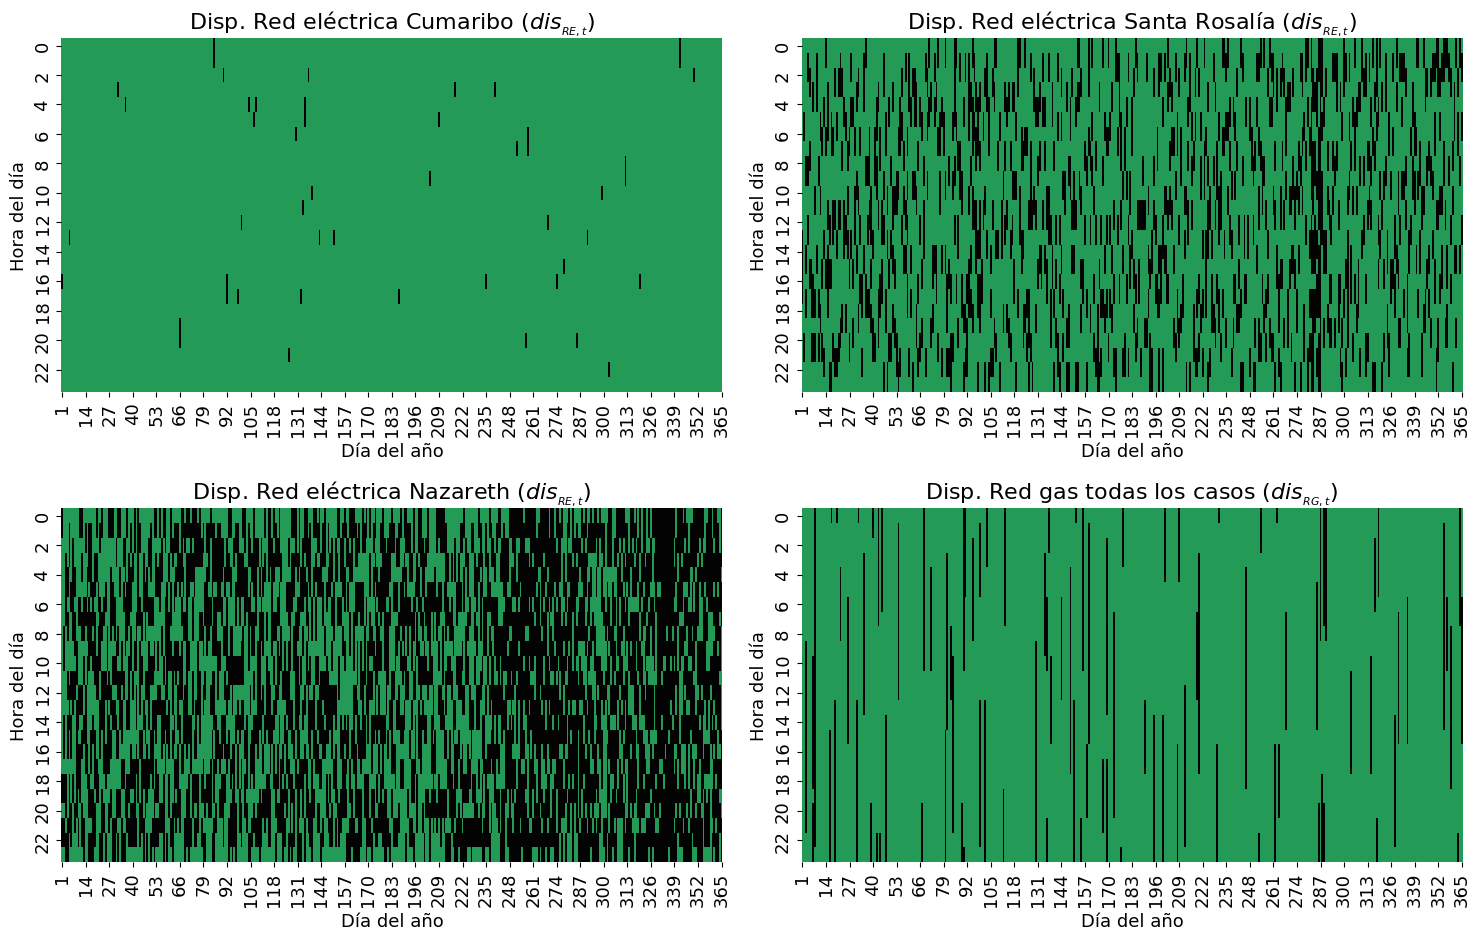

In [86]:
locaciones = ["cumaribo","rosalia","nazareth"]
dfs_series = [pd.read_excel("CaseData.xlsx", sheet_name=f"series_{loc}") for loc in locaciones]

df = pd.DataFrame()
for i, df_temp in enumerate(dfs_series):
    df[f"{locaciones[i]}"] = df_temp["AV_GRID_EL"]

df["gas"] = dfs_series[0]["AV_GRID_GAS"]

titles = [
    "Disp. Red eléctrica Cumaribo ($dis_{_{RE,t}}$)", 
    "Disp. Red eléctrica Santa Rosalía ($dis_{_{RE,t}}$)",
    "Disp. Red eléctrica Nazareth ($dis_{_{RE,t}}$)", 
    "Disp. Red gas todas los casos ($dis_{_{RG,t}}$)"
]

createfig_heatmap_matplotlib(df, df.columns.to_list(), titles=titles)

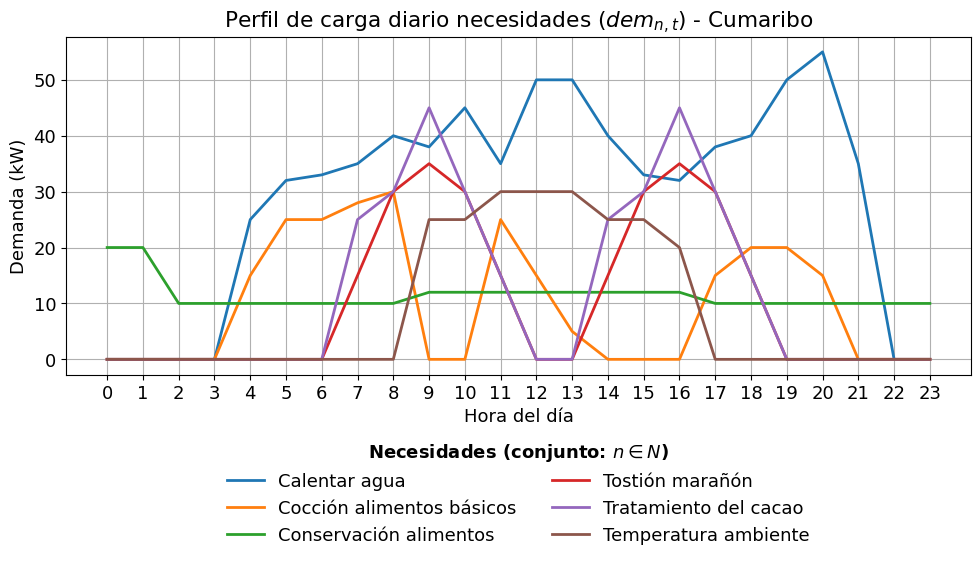

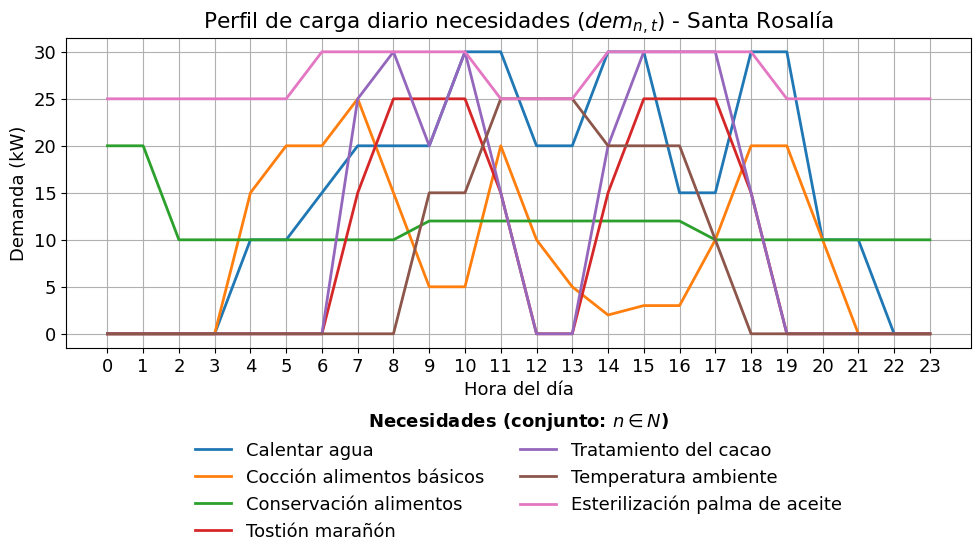

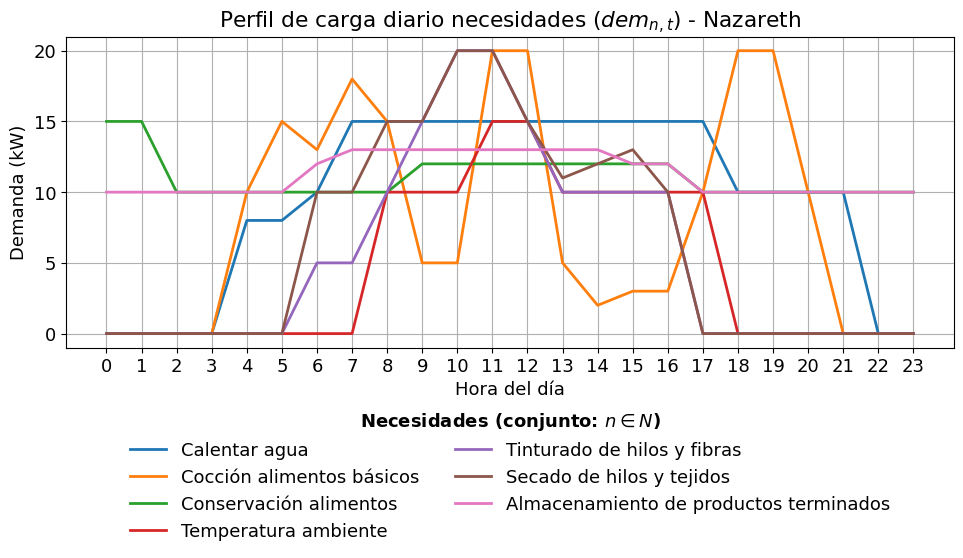

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Lista de nombres de hojas correspondientes a cada comunidad
sheets = ['necesidades_cumaribo', 'necesidades_rosalia', 'necesidades_nazareth']
titulos = ['Cumaribo','Santa Rosalía','Nazareth']

# Iterar sobre cada conjunto de datos
for i, sheet in enumerate(sheets):
    # Se asume que el archivo Excel con los datos se llama 'datos_necesidades.xlsx'
    df = pd.read_excel('CaseData.xlsx', sheet_name=sheet)
    
    # Las columnas '0' a '23' representan la demanda horaria (en kW)
    horas = [h for h in range(24)]
    
    plt.figure(figsize=(10, 6))
    # Graficar el perfil de cada necesidad
    for index, row in df.iterrows():
        perfil = row[horas].values
        plt.plot(range(24), perfil, label=re.sub(r'\s*\(.*?\)', '', row['Necesidad']).strip(), linewidth = 2)
    
    plt.xlabel('Hora del día')
    plt.ylabel('Demanda (kW)')
    plt.xticks(np.arange(24))  # Poner ticks en cada hora
    plt.title(rf'Perfil de carga diario necesidades ($dem_{{n,t}}$) - {titulos[i]}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False, title = "Necesidades (conjunto: $n \in N$)").get_title().set_fontweight("bold")
    plt.grid(True)
    plt.tight_layout()
    # Guardar la gráfica en un archivo PDF (opcional)
    plt.savefig(f'Figuras/pdf/casos_perfil_necesidades_{sheet.replace("necesidades_", "")}.pdf')
    plt.show()
